# Introduction

This notebook is a demo on how to setup a basic Workflow to Work with Jupyter Notebooks


## Setup project

For project setup we will use [poetry](https://python-poetry.org/docs/) as dependency management tool

In [4]:
import sys
import os

sys.path.append('../')
os.chdir("../")

In [2]:
!wget -O - https://install.python-poetry.org | python3 -

--2022-11-28 18:45:48--  https://install.python-poetry.org/
Resolving install.python-poetry.org (install.python-poetry.org)... 76.76.21.164, 76.76.21.22
Connecting to install.python-poetry.org (install.python-poetry.org)|76.76.21.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28457 (28K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]  27.79K  --.-KB/s    in 0.002s  

2022-11-28 18:45:48 (15.5 MB/s) - written to stdout [28457/28457]

Retrieving Poetry metadata

The latest version (1.2.2) is already installed.


In [5]:
import os

os.environ['PATH'] = f"{os.environ['PATH']}:/home/jovyan/.local/bin"

In [6]:
!poetry --version

Poetry (version 1.2.2)


In [7]:
import sys

os.environ['PYTHON_BIN'] = sys.executable

In [6]:
!poetry env info


Virtualenv
Python:         3.10.6
Implementation: CPython
Path:           /home/jovyan/.cache/pypoetry/virtualenvs/cd4ml-8EXZSVYp-py3.10
Executable:     /home/jovyan/.cache/pypoetry/virtualenvs/cd4ml-8EXZSVYp-py3.10/bin/python
Valid:          True

System
Platform:   linux
OS:         posix
Python:     3.10.6
Path:       /opt/conda
Executable: /opt/conda/bin/python3.10


In [7]:
!poetry env use system

In [1]:
!poetry config virtualenvs.create false
!poetry env remove --all

/bin/bash: line 1: poetry: command not found
/bin/bash: line 1: poetry: command not found


### Initialize project 

This will generate the structure necessary to run data science jobs

In [9]:
# Configure here package information that will be put in Poetry configuration
import sys
import os

os.environ['NAME'] = "cd4ml"
os.environ['DESCRIPTION'] = "Data science experiment tutorial"
os.environ['PYTHON'] = f"{sys.version_info[0]}.{sys.version_info[1]}.{sys.version_info[2]}"
os.environ['AUTHOR'] = "Eduardo Santos <eduardo.santos@thoughtworks.com>"

In [10]:
!poetry init --name="$NAME" --description="$DESCRIPTION" --python="$PYTHON" --author="$AUTHOR" --no-interaction

A pyproject.toml file with a poetry section already exists.


You can see generated file clicking here: [pyproject.toml](../pyproject.toml)

### Generate project structure

We are going to use as reference the [data science cookiecutter template](https://drivendata.github.io/cookiecutter-data-science/), which folllows this standard:

```
├── LICENSE
├── Makefile           <- Makefile with commands like `make data` or `make train`
├── README.md          <- The top-level README for developers using this project.
├── data
│   ├── external       <- Data from third party sources.
│   ├── interim        <- Intermediate data that has been transformed.
│   ├── processed      <- The final, canonical data sets for modeling.
│   └── raw            <- The original, immutable data dump.
│
├── docs               <- A default Sphinx project; see sphinx-doc.org for details
│
├── models             <- Trained and serialized models, model predictions, or model summaries
│
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering),
│                         the creator's initials, and a short `-` delimited description, e.g.
│                         `1.0-jqp-initial-data-exploration`.
│
├── references         <- Data dictionaries, manuals, and all other explanatory materials.
│
├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
│   └── figures        <- Generated graphics and figures to be used in reporting
│
├── pyproject.toml     <- Poetry configuration file
│
├── setup.py           <- makes project pip installable (pip install -e .) so src can be imported
├── src                <- Source code for use in this project.
│   ├── __init__.py    <- Makes src a Python module
│   │
│   ├── data           <- Scripts to download or generate data
│   │   └── make_dataset.py
│   │
│   ├── features       <- Scripts to turn raw data into features for modeling
│   │   └── build_features.py
│   │
│   ├── models         <- Scripts to train models and then use trained models to make
│   │   │                 predictions
│   │   ├── predict_model.py
│   │   └── train_model.py
│   │
│   └── visualization  <- Scripts to create exploratory and results oriented visualizations
│       └── visualize.py
│
└── tox.ini            <- tox file with settings for running tox; see tox.readthedocs.io
```

For now we just need the directories that will hold the data code

In [13]:
!mkdir -p src/data
!touch src/__init__.py

## Data extraction

For this example we will download some news feed data to use as a dataset. As this is an introductory example just a few news will be used

### Download data

The goal is to create the case as a multistep feature extraction. First step is to create a function to download data from a service provider

In [11]:
!poetry add feedparser pandas metaflow

The following packages are already present in the pyproject.toml and will be skipped:

  • feedparser
  • pandas
  • metaflow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [14]:
!poetry export -f requirements.txt --output requirements.txt
!pip install -r requirements.txt

Ignoring colorama: markers 'sys_platform == "win32" and python_full_version == "3.10.6"' don't match your environment
  Using cached astroid-2.12.13-py3-none-any.whl (264 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 7.2 MB/s eta 0:00:0000:010:01
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached feedparser-6.0.10-py3-none-any.whl (81 kB)
  Using cached isort-5.10.1-py3-none-any.whl (103 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached lazy-object-proxy-1.8.0.tar.gz (41 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mccabe-0.7.0-py2.py3-none-any.whl (7.3 kB)
  Using cached metaflow-2.7.14-py2.py3-none-any.whl (853 kB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (13.9 MB)
     ━━━━━━━━━━━━━━━

In [15]:
import feedparser
import pandas as pd

url = 'https://g1.globo.com/rss/g1/'

blog_feed = feedparser.parse(url)

posts = blog_feed.entries  
post_list = []

for post in posts:
    post_dict = dict()

    post_dict["TITLE"] = post.title
    post_dict["CONTENT"] = post.summary
    post_dict["LINK"] = post.link
    post_dict["TIME_PUBLISHED"] = post.published
    # post_dict["TAGS"] = [tag.term for tag in post.tags]

    post_list.append(post_dict)
df_post = pd.DataFrame(post_list)
df_post

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Perfil da PM em SC curte posts antidemocrático...,"<img src=""https://s2.glbimg.com/hHaPhjo7AiNLn-...",https://g1.globo.com/sc/santa-catarina/noticia...,"Mon, 28 Nov 2022 18:39:29 -0000"
1,Ponte que liga Toca da Onça a Rio Bonito é rec...,"<img src=""https://s2.glbimg.com/iA1ARsUvBzuFOH...",https://g1.globo.com/rj/regiao-serrana/noticia...,"Mon, 28 Nov 2022 18:39:25 -0000"
2,Menina denuncia estupro à professora e ex-padr...,"<img src=""https://s2.glbimg.com/DsJJ0ftZ_UF0g9...",https://g1.globo.com/go/goias/noticia/2022/11/...,"Mon, 28 Nov 2022 18:38:07 -0000"
3,Treinador é preso no meio de partida de handeb...,"<img src=""https://s2.glbimg.com/lGTqe75_EueDyo...",https://g1.globo.com/sc/santa-catarina/noticia...,"Mon, 28 Nov 2022 18:36:53 -0000"
4,Presidente da Associação de Catadoras e Catado...,"<img src=""https://s2.glbimg.com/MOruxIfu5xe5ku...",https://g1.globo.com/se/sergipe/noticia/2022/1...,"Mon, 28 Nov 2022 18:33:29 -0000"
5,"VÍDEOS: AB1 de segunda-feira, 28 de novembro","<img src=""https://s2.glbimg.com/QHEuQoE9N98BI0...",https://g1.globo.com/pe/caruaru-regiao/edicao/...,"Mon, 28 Nov 2022 18:31:45 -0000"
6,Homem matou ex com um tiro na cabeça em frente...,"<img src=""https://s2.glbimg.com/VYG-_GYfr3uh6U...",https://g1.globo.com/rs/rio-grande-do-sul/noti...,"Mon, 28 Nov 2022 18:31:31 -0000"
7,Mulher leva tiro na cabeça enquanto assistia j...,"<img src=""https://s2.glbimg.com/Af4Z8E2f5SH5N5...",https://g1.globo.com/to/tocantins/noticia/2022...,"Mon, 28 Nov 2022 18:31:08 -0000"
8,Cresol constitui cooperativa no Mato Grosso,"<img src=""https://s2.glbimg.com/kwDswG7_VnwyUz...",https://g1.globo.com/pr/parana/especial-public...,"Mon, 28 Nov 2022 18:30:12 -0000"
9,Espetáculo 'Cabaré Chinelo' encerra temporada ...,"<img src=""https://s2.glbimg.com/am3JENH4WLtILA...",https://g1.globo.com/am/amazonas/noticia/2022/...,"Mon, 28 Nov 2022 18:30:08 -0000"


### Create your first metaflow workflow

Now that we downloaded the data we can use to create new features. Let's create a workflow to download feeds from differente providers. No we are going to user [Neflix Open Source metaflow Workflow package](https://metaflow.org/) to make the job easier.

In [16]:
!poetry add metaflow

The following packages are already present in the pyproject.toml and will be skipped:

  • metaflow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [17]:
!poetry export -f requirements.txt --output requirements.txt
!pip install -r requirements.txt

Ignoring colorama: markers 'sys_platform == "win32" and python_full_version == "3.10.6"' don't match your environment


In [56]:
%%writefile src/data/feeds_flow.py

import feedparser
import pandas as pd

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.end)
              
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()

Writing src/data/feeds_flow.py


In [57]:
!python src/data/feeds_flow.py show

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Creating local datastore in current directory (/home/jovyan/.metaflow)



Step start
    ?
    => fetch_feed_data

Step fetch_feed_data
    ?
    => feeds_aggregate

Step feeds_aggregate
    ?
    => end

Step end
    ?



In [58]:
!python src/data/feeds_flow.py run

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-11-25 19:46:55.608 Workflow starting (run-id 1669405615532166):
2022-11-25 19:46:55.636 [1669405615532166/start/1 (pid 11613)] Task is starting.
2022-11-25 19:46:56.291 [1669405615532166/start/1 (pid 11613)] Foreach yields 3 child steps.
2022-11-25 19:46:56.291 [1669405615532166/start/1 (pid 11613)] Task finished successfully.
2022-11-25 19:46:56.328 [1669405615532166/fetch_feed_data/2 (pid 11617)] Task is starting.
2022-11-25 19:46:56.347 [1669405615532166/fetch_feed_data/3 (pid 11618)] Task is starting.
2022-11-25 19:46:56.370 [1669405615532166/fetch_feed_data/4 (pid 11619)] Task is starting.
2022-11-25 19:46:57.059 [1669405615532166/fetch_feed_data/2 (pid 11617)] Downloading from url https://feeds.folha.uol.com.br/emcimadahora/rss091.xml
2022-11-25 19:46:57.210 [1669405615532166/fetch_feed_data/4 (pid 11619)] Downloading from url https://g

### Investigating results

Metaflow package has a builtin experiment versioning system. Let's analyze the worflow and its executions so far

In [59]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1669405615532166')]

It is possible to see all valid runs, that by now are running locally. Let's analyze the results from last run.

In [60]:
from metaflow import Run
r = fl.latest_run

Acessing the `data` attribute for the run it is possible to see the final result consolidated by the run. Let's analyze it and compare to the manually generated data created before

In [61]:
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Maldição da Copa estraga até os melhores bares,"Na Copa do Mundo, como em qualquer outra ocasi...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:32:00 -0300
1,Fifa divulga dados de público maiores que capa...,"Deu no álbum da <a href=""https://www1.folha.uo...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:28:00 -0300
2,"Economia libera R$ 37,4 milhões para PF retoma...",O Ministério da Economia editou uma portaria p...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:23:00 -0300
3,Ingleses voltam a protestar contra o racismo a...,Da mesma forma que fizeram na estreia da <a hr...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:15:00 -0300
4,Arqueólogos solucionam mistério e encontram mu...,"Uma equipe de <a href=""https://www1.folha.uol....",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:11:00 -0300
...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000"
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000"
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000"
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000"


There's a new run with the new features. One of the most important features in metaflow is the experiment versioning. Loading the new execution it is possible to see the newly generated results.

### Date conversion

As the feeds have different formats for date, let's try to generate an unified date field. Again we load and generate a new file for the flow

In [1]:
!poetry add pendulum

/bin/bash: line 1: poetry: command not found


In [2]:
!poetry export -f requirements.txt --output requirements.txt
!pip install -r requirements.txt

/bin/bash: line 1: poetry: command not found
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [8]:
%%writefile src/data/feeds_flow.py
# %load src/data/feeds_flow.py

import feedparser
import pandas as pd
import re

from nltk import word_tokenize
from nltk.corpus import stopwords

import string
import pendulum

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]
            
            # First date conversion try:
            dt = None
            try:
                dt = pendulum.from_format(post.published, 'DD MMM YYYY HH:mm:ss ZZ') 
            except ValueError as e:
                dt = pendulum.from_format(post.published, 'ddd, DD MMM YYYY HH:mm:ss ZZ')
            except ValueError as e:
                print(f"Formating error!\n{e}")
            post_dict['PUBLISHED'] = dt

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.end)
    
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()


Overwriting src/data/feeds_flow.py


In [9]:
!python src/data/feeds_flow.py run

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-11-30 18:25:33.773 Workflow starting (run-id 1669832733704161):
2022-11-30 18:25:33.801 [1669832733704161/start/1 (pid 779)] Task is starting.
2022-11-30 18:25:34.545 [1669832733704161/start/1 (pid 779)] Foreach yields 3 child steps.
2022-11-30 18:25:34.545 [1669832733704161/start/1 (pid 779)] Task finished successfully.
2022-11-30 18:25:34.582 [1669832733704161/fetch_feed_data/2 (pid 785)] Task is starting.
2022-11-30 18:25:34.608 [1669832733704161/fetch_feed_data/3 (pid 786)] Task is starting.
2022-11-30 18:25:34.634 [1669832733704161/fetch_feed_data/4 (pid 787)] Task is starting.
2022-11-30 18:25:35.285 [1669832733704161/fetch_feed_data/2 (pid 785)] Downloading from url https://feeds.folha.uol.com.br/emcimadahora/rss091.xml
2022-11-30 18:25:35.285 [1669832733704161/fetch_feed_data/3 (pid 786)] Downloading from url https://g1.globo.com/rss/

Let's see again the output data

In [10]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1669832733704161'),
 Run('FeedsFlow/1669814218230777'),
 Run('FeedsFlow/1669663064156463'),
 Run('FeedsFlow/1669662972231051'),
 Run('FeedsFlow/1669662883241928'),
 Run('FeedsFlow/1669662826619175'),
 Run('FeedsFlow/1669662610850940'),
 Run('FeedsFlow/1669662020330580'),
 Run('FeedsFlow/1669661549998739'),
 Run('FeedsFlow/1669661480857384'),
 Run('FeedsFlow/1669644559679984'),
 Run('FeedsFlow/1669406103878472'),
 Run('FeedsFlow/1669406058484905'),
 Run('FeedsFlow/1669405882277582'),
 Run('FeedsFlow/1669405615532166')]

In [11]:
from metaflow import Run
r = fl.latest_run
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED,PUBLISHED
0,Multidão em Melbourne comemora classificação d...,"O gol da <a href=""https://www1.folha.uol.com.b...",https://redir.folha.com.br/redir/online/emcima...,30 Nov 2022 15:16:00 -0300,2022-11-30 15:16:00-03:00
1,Número de infecções sexualmente transmissíveis...,O número de infecções sexualmente transmissíve...,https://redir.folha.com.br/redir/online/emcima...,30 Nov 2022 15:16:00 -0300,2022-11-30 15:16:00-03:00
2,Influenciadora Karen Bachini pede desculpas po...,A maquiadora e influenciadora Karen Bachini po...,https://redir.folha.com.br/redir/online/emcima...,30 Nov 2022 15:16:00 -0300,2022-11-30 15:16:00-03:00
3,Posse de Lula terá shows de Pabllo Vittar e Ch...,"A futura primeira-dama, <a href=""https://www1....",https://redir.folha.com.br/redir/online/emcima...,30 Nov 2022 15:14:00 -0300,2022-11-30 15:14:00-03:00
4,Iraniano que comemorou derrota do país para os...,Um iraniano foi morto a tiros por forças de se...,https://redir.folha.com.br/redir/online/emcima...,30 Nov 2022 15:14:00 -0300,2022-11-30 15:14:00-03:00
...,...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000",2018-07-23 15:33:44+00:00
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000",2018-07-23 15:30:17+00:00
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000",2018-07-23 15:21:41+00:00
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000",2018-07-23 15:06:03+00:00


### Final basic flow

Let's visualize it and see hot the basic flow stands

In [17]:
!mamba install -y graphviz


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.27.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['graphviz']

[+] 0.0s
[+] 0.1s
conda-forge/linux-aarch64 ━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @  ?

In [14]:
!poetry add --group dev graphviz

The following packages are already present in the pyproject.toml and will be skipped:

  • graphviz

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [19]:
!poetry export --with dev -f requirements.txt --output requirements.txt
!pip install -r requirements.txt

Ignoring colorama: markers 'sys_platform == "win32" and python_full_version == "3.10.6" or platform_system == "Windows" and python_full_version == "3.10.6"' don't match your environment
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [20]:
!mkdir -p data
!python src/data/feeds_flow.py output-dot | dot -o data/feeds.dot

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Visualizing the flow as a GraphViz graph
    Try piping the output to 'dot -Tpng -o graph.png' to produce an actual image.


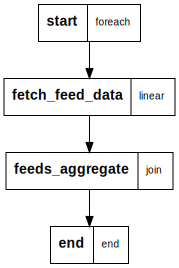

In [21]:
import graphviz

graphviz.Source.from_file('data/feeds.dot')

## Writing results

Finally we will use the generated Dataframe to save parquet generated files that can be used on next steps. To do that the chosen engine will be [fastparquet](https://fastparquet.readthedocs.io/en/latest/index.html), which will allow us to update the data as the script runs.

In [26]:
!poetry add fastparquet

Using version ^2022.11.0 for fastparquet

Updating dependencies
Resolving dependencies... (0.7s)

Writing lock file

No dependencies to install or update


In [27]:
!poetry export -f requirements.txt --output requirements.txt
!pip install -r requirements.txt

Ignoring colorama: markers 'sys_platform == "win32" and python_full_version == "3.10.6" or platform_system == "Windows" and python_full_version == "3.10.6"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 6.2 MB/s eta 0:00:00


Following data science layout, parquet file will be stored in `data` directory. Let's use the configuration layout of filesystem URL, because we can change it later when we add remote features or move data to production.

In [47]:
import os

os.environ['DATA_DIR'] = os.path.join(os.path.abspath("./"), './data')
os.environ['FILEPATH'] = os.path.join(os.environ['DATA_DIR'], './news')
os.environ['FILEPATH']

'/home/jovyan/data/news'

In [48]:
!mkdir -p "$FILEPATH"

In [49]:
%env FILENAME=news.parquet

env: FILENAME=news.parquet


In [22]:
%%writefile src/data/feeds_flow.py
# %load src/data/feeds_flow.py
import os
import feedparser
import pandas as pd
import re

from nltk import word_tokenize
from nltk.corpus import stopwords

import string
import pendulum

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]
            
            # First date conversion try:
            dt = None
            try:
                dt = pendulum.from_format(post.published, 'DD MMM YYYY HH:mm:ss ZZ') 
            except ValueError as e:
                dt = pendulum.from_format(post.published, 'ddd, DD MMM YYYY HH:mm:ss ZZ')
            except ValueError as e:
                print(f"Formating error!\n{e}")
                continue
            post_dict['PUBLISHED'] = dt.isoformat()
            post_dict['PUBLISHED_DATE'] = dt.to_date_string()

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.end)
    
    @step
    def end(self):
        filepath = os.path.join(os.environ['FILEPATH'], os.environ['FILENAME'])
        print(f'Writing data back to parquet at {filepath}...')
        columns = ['TITLE', 'CONTENT', 'LINK', 'PUBLISHED', 'PUBLISHED_DATE', 'token_set']
        # Partition news by date
        try:
            self.results[columns].to_parquet(filepath, append=True, engine='fastparquet', index=False, partition_cols=['PUBLISHED_DATE'])
        except FileNotFoundError as e:
            # Create file if it does not exists
            self.results[columns].to_parquet(filepath, append=False, engine='fastparquet', index=False, partition_cols=['PUBLISHED_DATE'])
        
if __name__ == '__main__':
    FeedsFlow()


Overwriting src/data/feeds_flow.py


In [64]:
!python src/data/feeds_flow.py run

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-11-30 13:16:58.285 Workflow starting (run-id 1669814218230777):
2022-11-30 13:16:58.307 [1669814218230777/start/1 (pid 26752)] Task is starting.
2022-11-30 13:16:59.068 [1669814218230777/start/1 (pid 26752)] Foreach yields 3 child steps.
2022-11-30 13:16:59.068 [1669814218230777/start/1 (pid 26752)] Task finished successfully.
2022-11-30 13:16:59.101 [1669814218230777/fetch_feed_data/2 (pid 26756)] Task is starting.
2022-11-30 13:16:59.123 [1669814218230777/fetch_feed_data/3 (pid 26757)] Task is starting.
2022-11-30 13:16:59.145 [1669814218230777/fetch_feed_data/4 (pid 26758)] Task is starting.
2022-11-30 13:17:00.118 [1669814218230777/fetch_feed_data/3 (pid 26757)] Downloading from url https://g1.globo.com/rss/g1/
2022-11-30 13:17:00.156 [1669814218230777/fetch_feed_data/2 (pid 26756)] Downloading from url https://feeds.folha.uol.com.br/emci

Now we can load and see how the results are stored back on parquet

In [62]:
import os

import pandas as pd

filepath = os.path.join(os.environ['FILEPATH'], os.environ['FILENAME'])
test = pd.read_parquet(filepath, engine='fastparquet')
test

,TITLE,CONTENT,LINK,PUBLISHED,PUBLISHED_DATE
0,"Com surto na região Norte, campanha contra o s...","<img src=""https://s2.glbimg.com/HA6WyXj_0FWazn...",https://g1.globo.com/ap/amapa/noticia/2018/07/...,2018-07-23T22:40:12+00:00,2018-07-23
1,Polícia Civil de Juiz de Fora recebe denúncia ...,Duas firmas são de São Paulo e uma de Belo Hor...,https://g1.globo.com/mg/zona-da-mata/noticia/2...,2018-07-23T21:01:26+00:00,2018-07-23
2,Segunda edição do ‘Encontro de Bateristas do T...,"<img src=""https://s2.glbimg.com/ygBGnNNFsGwUPA...",https://g1.globo.com/mg/triangulo-mineiro/noti...,2018-07-23T20:45:48+00:00,2018-07-23
3,Comissariado do AP fiscaliza embarque de menor...,"<img src=""https://s2.glbimg.com/3ywfLG3crqb2_I...",https://g1.globo.com/ap/amapa/noticia/2018/07/...,2018-07-23T20:36:37+00:00,2018-07-23
4,Ceará tem 66 municípios com emergência reconhe...,"<img src=""https://s2.glbimg.com/aktFEMxx84AuWQ...",https://g1.globo.com/ce/ceara/noticia/2018/07/...,2018-07-23T20:13:49+00:00,2018-07-23
...,...,...,...,...,...
175,Por que a esquadria de alumínio se tornou um d...,"<img src=""https://s2.glbimg.com/k5A5kFIGvVX5Ib...",https://g1.globo.com/ba/bahia/especial-publici...,2022-11-28T18:40:41+00:00,2022-11-28
176,Perfil da PM em SC curte posts antidemocrático...,"<img src=""https://s2.glbimg.com/hHaPhjo7AiNLn-...",https://g1.globo.com/sc/santa-catarina/noticia...,2022-11-28T18:39:29+00:00,2022-11-28
177,Ponte que liga Toca da Onça a Rio Bonito é rec...,"<img src=""https://s2.glbimg.com/iA1ARsUvBzuFOH...",https://g1.globo.com/rj/regiao-serrana/noticia...,2022-11-28T18:39:25+00:00,2022-11-28
178,Menina denuncia estupro à professora e ex-padr...,"<img src=""https://s2.glbimg.com/DsJJ0ftZ_UF0g9...",https://g1.globo.com/go/goias/noticia/2022/11/...,2022-11-28T18:38:07+00:00,2022-11-28
